  # Handwritten Digit Recommendation, Multiclass

## 1 - Packages

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from autils import *
from lab_utils_softmax import plt_softmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.activations import linear, relu, sigmoid


import tensorflow as tf


plt.style.use('./deeplearning.mplstyle')
%matplotlib widget



## 2 - Utils

In [91]:
def my_softmax(z):
    e_z = np.exp(z)
    prob = e_z / np.sum(e_z)
    return prob

In [92]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


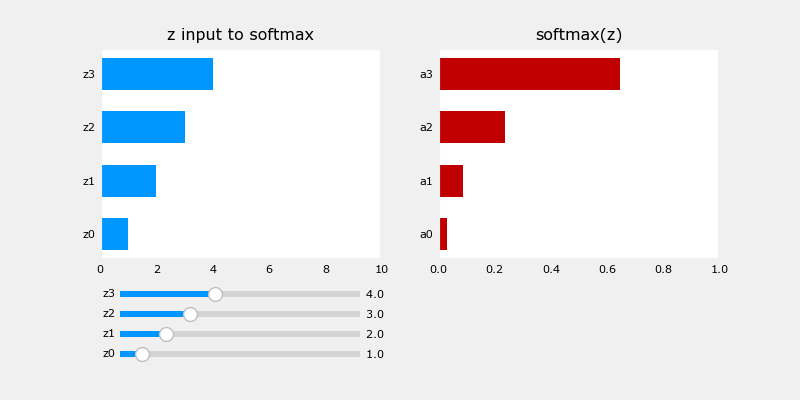

In [93]:
plt.close("all")
plt_softmax(my_softmax)

## 3 - Dataset

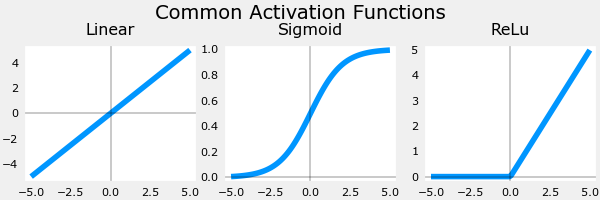

In [94]:
plt_act_trio()

In [95]:
X, y = load_data()

In [96]:
print(f'Shape of X-->{X.shape}, y-->{y.shape}')

Shape of X-->(5000, 400), y-->(5000, 1)


In [97]:
print(f'mean of x: {np.mean(X)}, std: {np.std(X)}')
print(f'label y: {np.unique(y)}')

mean of x: 0.13133913007984085, std: 0.2950516037951936
label y: [0 1 2 3 4 5 6 7 8 9]


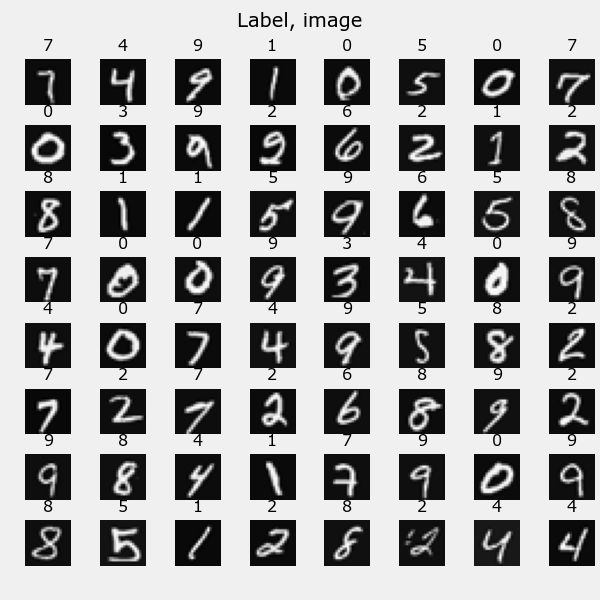

In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(6,6))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshape = X[random_index].reshape((20, 20)).T
    
    ax.imshow(X_random_reshape, cmap='gray')
    
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle('Label, image', fontsize=14)

## 4 - Model

In [82]:
tf.random.set_seed(1234)
model = Sequential([
    Input((400,)),
    Dense(units=25, activation='relu', name='L1'),
    Dense(units=15, activation='relu', name='L2'),
    Dense(units=10, activation='linear', name='L3'),

], name = 'my_model')

In [83]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(
        loss = SparseCategoricalCrossentropy(from_logits=True),
        optimizer = Adam(learning_rate = 0.001)
)

In [85]:
history = model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.5456
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5693
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3972
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3306
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2943
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2476
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2290
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2172
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1978
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1875
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1785
Epoch 13/40
157/157 [====

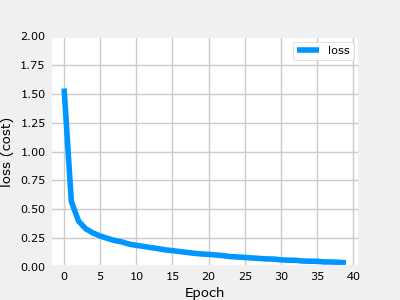

In [86]:
plot_loss_tf(history)

In [87]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 157}

In [88]:
history.history.keys()

dict_keys(['loss'])

In [89]:
history.history['loss']

[1.5455622673034668,
 0.5693106651306152,
 0.3971812427043915,
 0.3305613100528717,
 0.29425278306007385,
 0.26841863989830017,
 0.24763037264347076,
 0.22896884381771088,
 0.21723303198814392,
 0.19781532883644104,
 0.18750415742397308,
 0.1785186529159546,
 0.1679621934890747,
 0.15930166840553284,
 0.14818689227104187,
 0.1414816975593567,
 0.1338394433259964,
 0.12617173790931702,
 0.11860142648220062,
 0.112807996571064,
 0.10912047326564789,
 0.10394822806119919,
 0.09823857992887497,
 0.09008318930864334,
 0.08676909655332565,
 0.08254324644804001,
 0.07822708040475845,
 0.07434088736772537,
 0.06969043612480164,
 0.06858981400728226,
 0.06200996786355972,
 0.05891013145446777,
 0.058170631527900696,
 0.051706183701753616,
 0.05003838986158371,
 0.04968394711613655,
 0.043488722294569016,
 0.04326477274298668,
 0.040181901305913925,
 0.03697177395224571]

1/1 [==============================] - 0s 19ms/step
Prediction: [[ -0.57 -26.32  16.72   2.58  -7.36  -0.77  -5.09 -11.12   2.3   -3.33]]
Probability: [[3.11e-08 2.05e-19 1.00e+00 7.24e-07 3.50e-11 2.55e-08 3.39e-10 8.10e-13
  5.45e-07 1.97e-09]]
Sum of _: 1.0
Prediction of image: 2


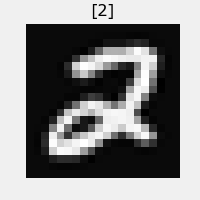

In [99]:
# prediction
index = 1234
image = X[index]

fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.imshow(image.reshape((20, 20)).T, cmap='gray')
ax.set_title(y[index])
ax.set_axis_off()
# plt.show()?

prediction = model.predict(image.reshape(1, 400))
print(f'Prediction: {prediction}')
probability = my_softmax(prediction)
print(f'Probability: {probability}')
print(f'Sum of _: {np.sum(probability)}')
print(f'Prediction of image: {np.argmax(prediction)}')